# Road Safety Project

The data below presents the number of road accidents by the speed zones and vehicle manoeuvring just before the incident.

It appears from chart 1 that most minor accidents occurred in regions where there was a 30mph speed limit.

Chart 2 shows that most accidents occurred when vehicles were overtaking in the UK. Turning right is the next vehicle manoeuvring that led to an incident. There might be a relationship between turning right and overtaking of vehicles as in the UK overtaking is done from the right of the vehicle in front.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Store filepath in a variable
file_one = "../Project/all.csv"

In [3]:
# Read Data file with the pandas library
file_one_df = pd.read_csv(file_one, encoding="ISO-8859-1")

# Show the first rows
file_one_df.head()

c:\users\arshad\anaconda3\envs\jupyterenv\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,Accident_Index,1st_Road_Class,Accident_Severity,Year,Date,Day_of_Week,Latitude,Light_Conditions,Local_Authority_(District),...,Journey_Purpose_of_Driver,Junction_Location,make,model,Propulsion_Code,Sex_of_Driver,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Type,Was_Vehicle_Left_Hand_Drive
0,478587,201001BS70003,B,Slight,2010,2010-01-11,Monday,51.484087,Daylight,Kensington and Chelsea,...,Commuting to/from work,Mid Junction - on roundabout or on main road,CITROEN,BERLINGO FIRST 600,Petrol,Female,No tow/articulation,Turning right,Van / Goods 3.5 tonnes mgw or under,No
1,478588,201001BS70004,A,Slight,2010,2010-01-11,Monday,51.509212,Darkness - lights lit,Kensington and Chelsea,...,Journey as part of work,Mid Junction - on roundabout or on main road,RENAULT,SCENIC DYN DCI 130,Heavy oil,Male,No tow/articulation,Going ahead other,Car,No
2,478589,201001BS70007,Unclassified,Slight,2010,2010-01-02,Saturday,51.513314,Darkness - lights lit,Kensington and Chelsea,...,Other/Not known (2005-10),Mid Junction - on roundabout or on main road,NISSAN,PRIMERA SVE CVT,Petrol,Female,No tow/articulation,Going ahead right-hand bend,Car,No
3,478590,201001BS70007,Unclassified,Slight,2010,2010-01-02,Saturday,51.513314,Darkness - lights lit,Kensington and Chelsea,...,Other/Not known (2005-10),Mid Junction - on roundabout or on main road,MERCEDES,A140 ELEGANCE,Petrol,Female,No tow/articulation,Going ahead other,Car,No
4,478591,201001BS70008,A,Slight,2010,2010-01-04,Monday,51.484361,Darkness - lights lit,Kensington and Chelsea,...,Journey as part of work,Mid Junction - on roundabout or on main road,VAUXHALL,ZAFIRA ELEGANCE DTI,Heavy oil,Male,No tow/articulation,Turning right,Taxi/Private hire car,No


In [4]:
#List the type of data
file_one_df.dtypes

Unnamed: 0                       int64
Accident_Index                  object
1st_Road_Class                  object
Accident_Severity               object
Year                             int64
Date                            object
Day_of_Week                     object
Latitude                       float64
Light_Conditions                object
Local_Authority_(District)      object
Longitude                      float64
Number_of_Casualties             int64
Number_of_Vehicles               int64
Road_Surface_Conditions         object
Road_Type                       object
Special_Conditions_at_Site      object
Speed_limit                      int64
Time                            object
Urban_or_Rural_Area             object
Weather_Conditions              object
Age_Band_of_Driver              object
Age_of_Vehicle                   int64
Engine_Capacity_.CC.             int64
Journey_Purpose_of_Driver       object
Junction_Location               object
make                     

In [5]:
# list column headers
file_one_df.columns

Index(['Unnamed: 0', 'Accident_Index', '1st_Road_Class', 'Accident_Severity',
       'Year', 'Date', 'Day_of_Week', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Longitude', 'Number_of_Casualties',
       'Number_of_Vehicles', 'Road_Surface_Conditions', 'Road_Type',
       'Special_Conditions_at_Site', 'Speed_limit', 'Time',
       'Urban_or_Rural_Area', 'Weather_Conditions', 'Age_Band_of_Driver',
       'Age_of_Vehicle', 'Engine_Capacity_.CC.', 'Journey_Purpose_of_Driver',
       'Junction_Location', 'make', 'model', 'Propulsion_Code',
       'Sex_of_Driver', 'Towing_and_Articulation', 'Vehicle_Manoeuvre',
       'Vehicle_Type', 'Was_Vehicle_Left_Hand_Drive'],
      dtype='object')

In [14]:
# create new df with the required columns
df = file_one_df.groupby(["Speed_limit"])["Accident_Index"].nunique().reset_index()
print(df)

   Speed_limit  Accident_Index
0           10               1
1           15               1
2           20           15814
3           30          469555
4           40           66864
5           50           31025
6           60          110438
7           70           56907


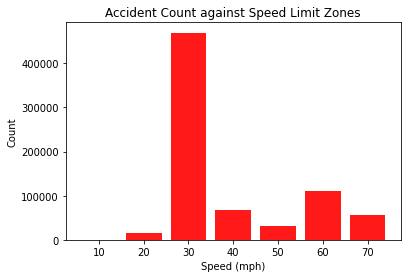

In [15]:
# create chart of speed limit against the number of incidents
Speed = df["Speed_limit"]
Count = df["Accident_Index"]

plt.bar(Speed, Count, color='r', alpha=0.9, align="center", width=8)

plt.title("Accident Count against Speed Limit Zones")
plt.xlabel("Speed (mph)")
plt.ylabel("Count")


plt.show()

In [10]:
# create new df
df2 = file_one_df.groupby(["Vehicle_Manoeuvre"])["Accident_Index"].nunique().reset_index()
df2

,Vehicle_Manoeuvre,Accident_Index
0,Changing lane to left,8407
1,Changing lane to right,8585
2,Data missing or out of range,388
3,Going ahead left-hand bend,36508
4,Going ahead other,410579
5,Going ahead right-hand bend,42248
6,Moving off,43435
7,Overtaking - nearside,4981
8,Overtaking moving vehicle - offside,19553
9,Overtaking static vehicle - offside,11948


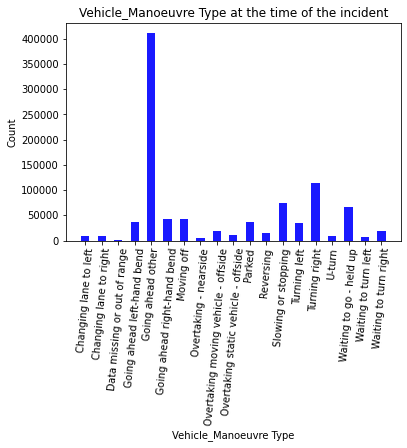

In [13]:
# create chart of vehicle manoeuvre against the number of incidents
Manouevre = df2["Vehicle_Manoeuvre"]
Count = df2["Accident_Index"]

plt.bar(Manouevre, Count, color='b', alpha=0.9, align="center", width=0.5)

plt.title("Vehicle_Manoeuvre Type at the time of the incident")
plt.xlabel("Vehicle_Manoeuvre Type")
plt.ylabel("Count")

plt.xticks(rotation=85)

plt.show()